2025-03-19 21:00:23 Chicago
2025-03-19 21:03:55 Rome


FileNotFoundError: [Errno 2] No such file or directory: 'images/street-orientations.png'

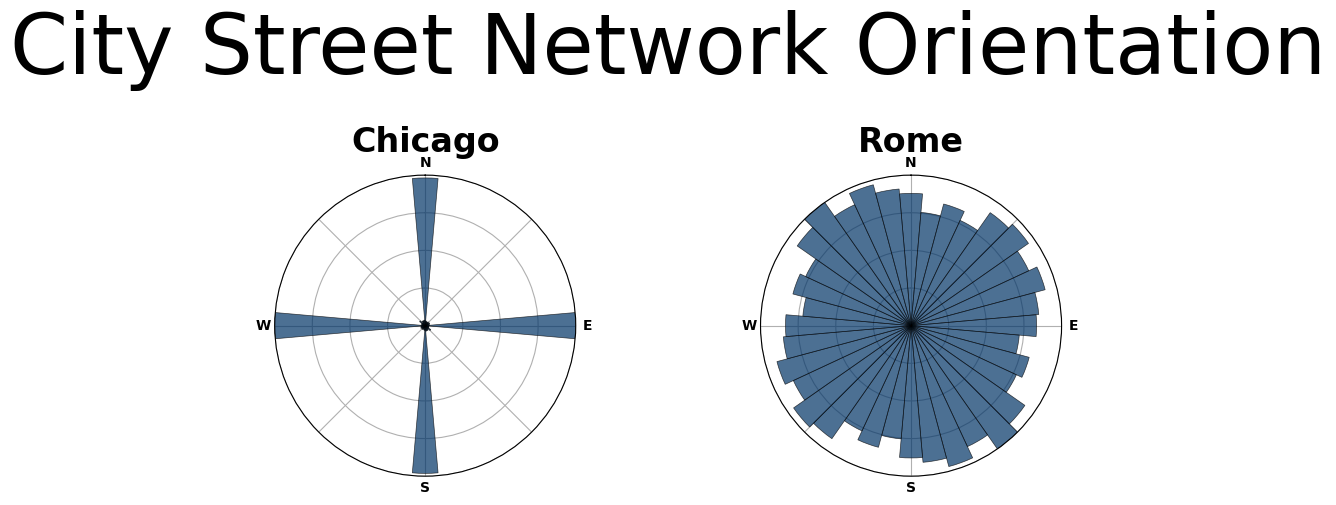

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox

weight_by_length = False

# define the study sites as label : query
places = {
"Chicago": "Chicago, Illinois, United States", "Rome": "Rome, Italy"
}
# verify OSMnx geocodes each query to what you expect (i.e., a [multi]polygon geometry)
gdf = ox.geocoder.geocode_to_gdf(list(places.values()))
gdf

# create figure and axes
n = len(places)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={"projection": "polar"})

# plot each city's polar histogram
for ax, place in zip(axes.flat, sorted(places.keys())):
    print(ox.utils.ts(), place)

    # get undirected graphs with edge bearing attributes
    G = ox.graph.graph_from_place(place, network_type="bike")
    Gu = ox.bearing.add_edge_bearings(ox.convert.to_undirected(G))
    fig, ax = ox.plot.plot_orientation(Gu, ax=ax, title=place, area=False)

# add figure title and save image
suptitle_font = {
    "family": "DejaVu Sans",
    "fontsize": 60,
    "fontweight": "normal",
    "y": 1,
}
fig.suptitle("City Street Network Orientation", **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
fig.savefig("images/street-orientations.png", facecolor="w", dpi=300, bbox_inches="tight")
plt.close()

In [ ]:
import osmnx as ox
import scipy

# Define the place and get the graph
place = "Madrid, Spain"
G = ox.graph_from_place(place, network_type='bike')

# Convert to undirected graph and add edge bearings
Gu = ox.bearing.add_edge_bearings(ox.convert.to_undirected(G))

# Calculate the orientation entropy
street_entropy = ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None)

print(f"Entropy of street orientations in the city: {street_entropy}")

2025-03-06 19:34:28 London


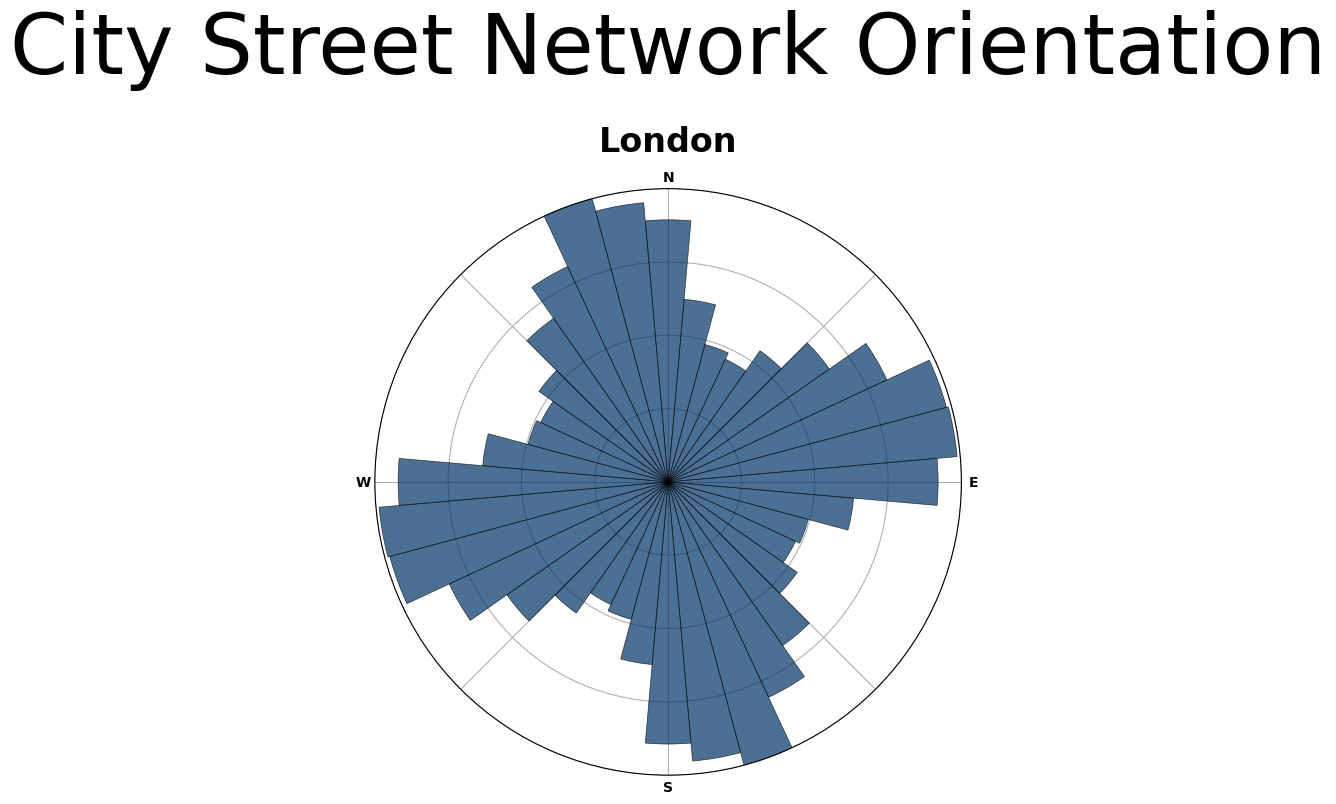

In [46]:
# Orientation Histogram - Polygon
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
from shapely.geometry import Polygon

# Define custom polygons for each city
city_polygons = {
    "London": Polygon([
    (-0.15959462510063094, 51.45871326661125),
    (-0.20527095224165798, 51.45498066376268),
    (-0.2794013848148002, 51.46384509715716),
    (-0.3018651522612069, 51.500684019001),
    (-0.29812119102013923, 51.53330123880726),
    (-0.2075173289363157, 51.59148819076247),
    (-0.12814535062567853, 51.61753179862907),
    (-0.03304873510255663, 51.61520708382517),
    (0.042579282563684165, 51.59427929131137),
    (0.06979633286079964, 51.55419159738553),
    (0.07363463506775911, 51.50053158112758),
    (0.047455151612534954, 51.45754671515023),
    (-0.11358833658457389, 51.43974802328263),
    (-0.16039408026716045, 51.45655808105909),
    (-0.15959462510063094, 51.45871326661125),
])
}

# Create figure and axes dynamically
n = len(city_polygons)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 8, nrows * 8)  # Increased figure size

# Handle the case when there's only one city
if n == 1:
    fig, axes = plt.subplots(figsize=figsize, subplot_kw={"projection": "polar"})
    axes = [axes]  # Convert to list for iteration
else:
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={"projection": "polar"})
    axes = axes.flatten()  # Flatten axes for consistent iteration

# Iterate through each manually defined polygon
for ax, (city_name, polygon) in zip(axes, city_polygons.items()):
    print(ox.utils.ts(), city_name)

    # Get the street network from the polygon
    G = ox.graph_from_polygon(polygon, network_type="bike")

    # Corrected: Convert to an undirected graph using the right function
    Gu = G.to_undirected()  
    Gu = ox.bearing.add_edge_bearings(Gu)

    # Plot street orientation
    fig, ax = ox.plot.plot_orientation(Gu, ax=ax, title=city_name, area=False)

# Add figure title and display the image
suptitle_font = {
    "family": "DejaVu Sans",
    "fontsize": 60,
    "fontweight": "normal",
    "y": 1,
}
fig.suptitle("City Street Network Orientation", **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
plt.show()  # Display the plot instead of saving it

In [1]:
# Entropy Calculation - Polygon
import osmnx as ox
import scipy
from shapely.geometry import Polygon

# Define the polygon for Copenhagen
Rome_Polygon = Polygon([
    (12.492723994716089, 41.98733409568501),
    (12.507422143193653, 41.99234120265869),
    (12.58257580982681, 41.95840747587212),
    (12.616946879775991, 41.916135305213786),
    (12.616488598848433, 41.89021270704638),
    (12.592392602172753, 41.83611944907146),
    (12.574047190954616, 41.81184654894561),
    (12.552706610558005, 41.80068350701413),
    (12.509607858443841, 41.793528563560066),
    (12.391371378885466, 41.8147087226386),
    (12.371780685999857, 41.86819411712853),
    (12.382688933238589, 41.91517522195645),
    (12.37885796068494, 41.9262003915643),
    (12.383027323908031, 41.95634501323702),
    (12.443496957867142, 41.98347079637595),
    (12.476231166392827, 41.98811424853595),
    (12.492723994716089, 41.98733409568501),
])

# Get the street network for the polygon
G = ox.graph_from_polygon(Rome_Polygon, network_type='bike')

# Convert to an undirected graph and add edge bearings
Gu = ox.bearing.add_edge_bearings(G.to_undirected())

# Calculate the orientation entropy
street_entropy = ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None)

print(f"Entropy of street orientations in the polygon-defined area: {street_entropy}")


Entropy of street orientations in the polygon-defined area: 3.580136632256402
